In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('diamonds.zip')

In [78]:
df.drop('Unnamed: 0', axis=1,inplace=True)

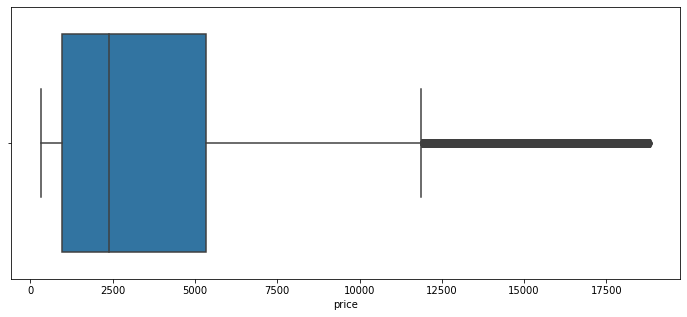

In [79]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x=df['price'])

In [80]:
len(df[df['price']>12000])/len(df)*100

6.420096403411198

In [50]:
# df = df[df['price']<=10000]

In [81]:
cut_dict = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair':1}
df['cut'] = df['cut'].map(cut_dict)

In [82]:
from sklearn.preprocessing import LabelEncoder

le_color = LabelEncoder()
df['color'] = le_color.fit_transform(df['color'])

le_clarity = LabelEncoder()
df['clarity'] = le_clarity.fit_transform(df['clarity'])

In [53]:
df_getdummies = pd.get_dummies(df[['color','clarity']],columns=['color','clarity'],drop_first=True)

In [54]:
X = df.drop('price',axis=1)
y = df['price']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

In [57]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_copy = ss.fit_transform(X_train_copy)
X_test_copy = ss.transform(X_test_copy)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [68]:
from sklearn import metrics

In [74]:
def machine_learning_score(regressor,X_train,y_train,X_test,y_test):
    regressor.fit(X_train,y_train)
    predictions = regressor.predict(X_test)
    print(f"Mean absolute error: {metrics.mean_absolute_error(y_test,predictions)}")
    print(f"Mean squared error: {metrics.mean_squared_error(y_test,predictions)}")
    print(f"Root Mean squared error: {np.sqrt(metrics.mean_squared_error(y_test,predictions))}")
    print(f"The explained variance score: {metrics.explained_variance_score(y_test,predictions)}")
#     sns.scatterplot(x=y_test,y=predictions)
    sns.distplot((y_test-predictions),bins=50)

Mean absolute error: 560.5335184158237
Mean squared error: 680035.4309993513
Root Mean squared error: 824.6426080426304
The explained variance score: 0.8810348279136203


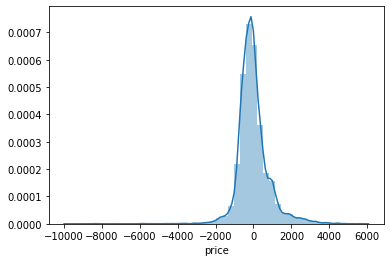

In [75]:
# linear regression

lr = LinearRegression()
machine_learning_score(lr,X_train_copy,y_train_copy,X_test_copy,y_test_copy)

Mean absolute error: 729.1762775925687
Mean squared error: 1679354.6964626177
Root Mean squared error: 1295.8991845288806
The explained variance score: 0.731560420997275


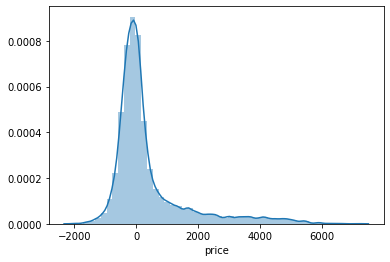

In [59]:
# Support Vector Machine

svr = SVR()
machine_learning_score(svr,X_train_copy,y_train_copy,X_test_copy,y_test_copy)

Mean absolute error: 275.13100711548987
Mean squared error: 222158.37344827584
Root Mean squared error: 471.33679407433897
The explained variance score: 0.9611338114341726


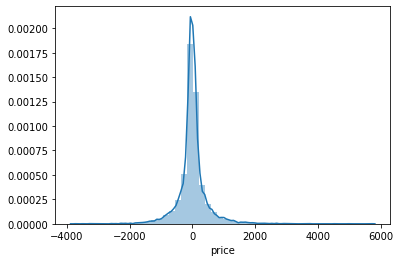

In [60]:
# k nearest neighbor
knr = KNeighborsRegressor()
machine_learning_score(knr,X_train_copy,y_train_copy,X_test_copy,y_test_copy)

Mean absolute error: 254.56438149972632
Mean squared error: 209295.67963191023
Root Mean squared error: 457.4884475392906
The explained variance score: 0.9633872472663461


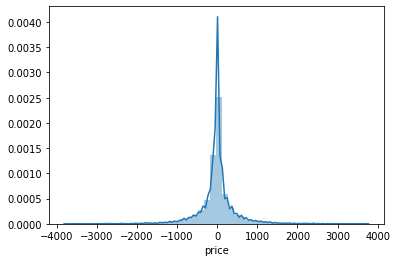

In [61]:
# decision tree
dtree = DecisionTreeRegressor()
machine_learning_score(dtree,X_train_copy,y_train_copy,X_test_copy,y_test_copy)

C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean absolute error: 197.990458206271
Mean squared error: 122703.88008440596
Root Mean squared error: 350.29113617733174
The explained variance score: 0.9785375459434366


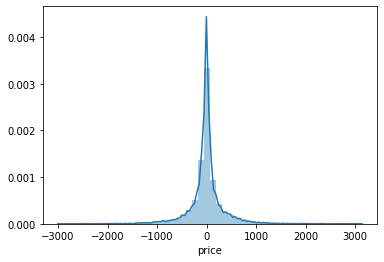

In [76]:
# random forest regressor
rfr = RandomForestRegressor()
machine_learning_score(rfr,X_train_copy,y_train_copy,X_test_copy,y_test_copy)